In [1]:
# pip install pandas matplotlib seaborn dataframe_image tabulate

In [2]:
# import yaml
from brand_yml import Brand
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy_financial as npf


# for visualizing images:
import requests
from PIL import Image as PILImage
from io import BytesIO

In [3]:
Protocol = None
brand = Brand.from_yaml("")

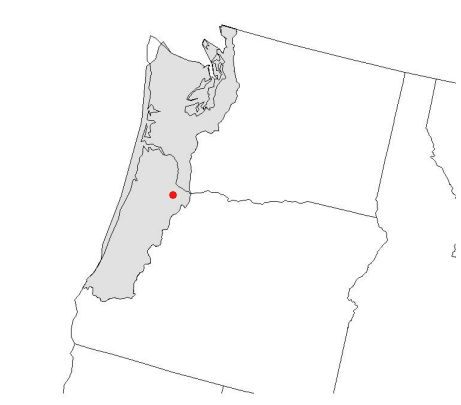

In [4]:
# load the data
dfStrategy = pd.read_csv("data/planting_design.csv", header=None)
dfSpecies = pd.read_csv("data/species_mix.csv", header=None)
dfFinancial1 = pd.read_csv("data/financial_options1.csv", header=None)
dfFinancial2 = pd.read_csv("data/financial_options2.csv", header=None)
dfCfin = pd.read_csv("data/carbon.csv")

# create temporary output directory
tmp_dir = Path("report_files/figure-typst")
tmp_dir.mkdir(parents=True,exist_ok=True)

# load variant and display image
dfVariant = pd.read_csv("data/variant.csv")
selected_variant = dfVariant.iloc[0]['variant']
image_path = f"data/fig/{selected_variant}variant.png"
variant_image = PILImage.open(image_path)
display(variant_image)

# Generate variant image .typ file
output_file = tmp_dir / "variant-image.typ"
typst_figure = f"""
#figure([
#box(image("../../data/fig/{selected_variant}variant.png", width: 80%))
], caption: figure.caption(
position: bottom,
[
  #align(right)[
  #text(weight: "bold", size: 11pt, fill: rgb("#005251"))[Figure 1. The project area location and boundaries of the corresponding FVS #footnote[#link("https://www.fs.usda.gov/managing-land/forest-management/fvs")[Forest Vegetation Simulator]] variant.]
]
]),
kind: "quarto-float-fig",
supplement: "Figure",
)
"""
with open(output_file, "w", encoding="utf-8") as f:
    f.write(typst_figure)

                                            Resilient Reforestation Plan

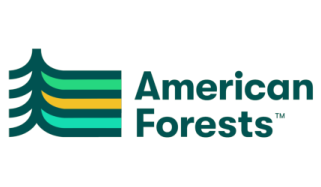

In [5]:
url = "https://logos-world.net/wp-content/uploads/2021/10/American-Forests-Logo.png"
response = requests.get(url)
logo = PILImage.open(BytesIO(response.content))

# typst shows it if we display as a matplotlib figure
plt.imshow(logo)
plt.axis("off")
plt.show()


Reforestation strategy

In [6]:
# create temporary output directory
tmp_dir = Path("report_files/figure-typst")
tmp_dir.mkdir(parents=True,exist_ok=True)

In [7]:
# Reforestation Strategy table
output_file = tmp_dir / "strategy-summary.typ"

table_rows = ",\n  ".join(
    f"[{row[0]}], [{row[1]}]" for _, row in dfStrategy.iterrows()
)

typst_table = f"""#table(
  columns: 2,
  stroke: none,
  align: (left, right),
  inset: (x: 4pt, y: 4pt),
  {table_rows}
)
"""

with open(output_file, "w", encoding="utf-8") as f:
    f.write(typst_table)


In [8]:
# Species Mix table
output_file = tmp_dir / "species-mix.typ"

table_rows = ",\n  ".join(
    f"[*{row[0]}*], [{row[1]}]" for _, row in dfSpecies.iterrows()
)

typst_table = f"""#table(
  columns: 2,
  stroke: none,
  align: (left, right),
  inset: (x: 4pt, y: 4pt),
  {table_rows}
)
"""
with open(output_file, "w", encoding="utf-8") as f:
    f.write(typst_table)

# typst_table

Carbon projections

In [9]:
protocol_colors = {
    "ACR": brand.color.palette["yellow"],
    "CAR": brand.color.palette["turquoise"],
    "VCS": brand.color.palette["orange"],
    "GS": brand.color.palette["forest-green"],
    "ISO": brand.color.palette["green"],
}

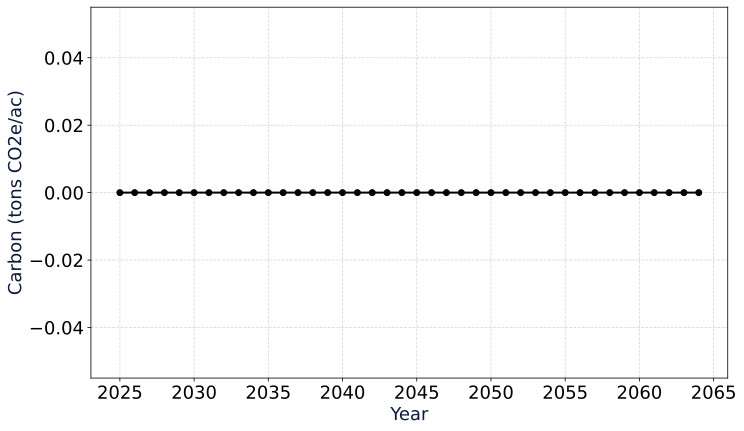

In [10]:
plt.figure(figsize=(10, 6))

for protocol, df_sub in dfCfin.groupby("Protocol"):
    plt.plot(
        df_sub["Year"],
        df_sub["Annual CO2 per acre"],
        marker="o",
        linewidth=2,
        color=protocol_colors.get(protocol, "black"),
        label=protocol
    )

plt.xlabel("Year", fontsize=18, color=brand.color.foreground)
plt.ylabel("Carbon (tons CO2e/ac)", fontsize=18, color=brand.color.foreground)

plt.grid(True, linestyle="--", alpha=0.5)
# plt.legend(title="Protocol")
plt.tight_layout()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

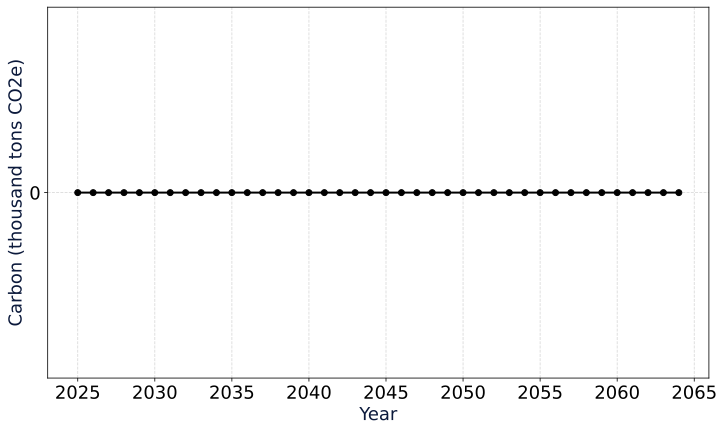

In [11]:
plt.figure(figsize=(10, 6))

df_sub_co2_thousands = df_sub["Annual CO2"] / 1_000

for protocol, df_sub in dfCfin.groupby("Protocol"):
    plt.plot(
        df_sub["Year"],
        df_sub_co2_thousands,
        marker="o",
        linewidth=2,
        color=protocol_colors.get(protocol, "black"),
        label=protocol
    )

plt.xlabel("Year", fontsize=18, color=brand.color.foreground)
plt.ylabel("Carbon (thousand tons CO2e)", fontsize=18, color=brand.color.foreground)

ticks = range(0, int(df_sub_co2_thousands.max()) + 1000, 1000)
plt.yticks(ticks, [f"{t:,}" for t in ticks])

plt.grid(True, linestyle="--", alpha=0.5)
# plt.legend(title="Protocol", fontsize=18)
plt.tight_layout()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

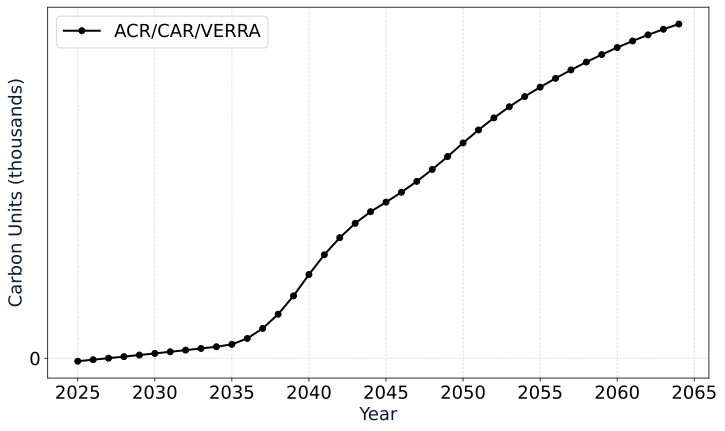

In [12]:
plt.figure(figsize=(10, 6))


for protocol, df_sub in dfCfin.groupby("Protocol"):
    plt.plot(
        df_sub["Year"],
        df_sub["CUs"] / 1_000,
        marker="o",
        linewidth=2,
        color=protocol_colors.get(protocol, "black"),
        label=protocol
    )

plt.xlabel("Year", fontsize=18, color=brand.color.foreground)
plt.ylabel("Carbon Units (thousands)", fontsize=18, color=brand.color.foreground)

ticks = range(0, int((df_sub["CUs"] / 1_000).max()) + 100, 100)
plt.yticks(ticks, [f"{t:,}" for t in ticks])

plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=18)
plt.tight_layout()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Financial projections

In [13]:
# Financial Options table 1
output_file = tmp_dir / "financial-options1.typ"

def escape_typst(text):
    return str(text).replace('#', '\#').replace('$', '\$').replace('%', '\%')

table_rows = ",\n  ".join(
    f"[*{escape_typst(row[0])}*], [{escape_typst(row[1])}]" for _, row in dfFinancial1.iterrows()
)

typst_table = f"""#table(
  columns: 2,
  stroke: none,
  align: (left, right),
  inset: (x: 0pt, y: 6pt),
  {table_rows}
)
"""
with open(output_file, "w", encoding="utf-8") as f:
    f.write(typst_table)

# display(typst_table)


In [14]:
# Financial Options table 2
output_file = tmp_dir / "financial-options2.typ"

table_rows = ",\n  ".join(
    f"[*{escape_typst(row[0])}*], [{escape_typst(row[1])}]" for _, row in dfFinancial2.iterrows()
)

typst_table = f"""#table(
  columns: 2,
  stroke: none,
  align: (left, right),
  inset: (x: 0pt, y: 6pt),
  {table_rows}
)
"""
with open(output_file, "w", encoding="utf-8") as f:
    f.write(typst_table)

# display(typst_table)


In [15]:
# Calculate NPV
anticipated_inflation = 0.00
discount_rate = 0.06
combined_rate = anticipated_inflation + discount_rate

def npv_20yr_for_protocol(df_protocol):
    # keep only first 20 years from this protocol’s data
    net_rev_20yr = df_protocol[df_protocol["Year"] <= (dfCfin["Year"].min() + 20)]["NetRevenue"].values
    
    # compute NPV
    return npf.npv(combined_rate, net_rev_20yr)


npv_by_protocol = (
    dfCfin
    .groupby("Protocol")
    .apply(npv_20yr_for_protocol)
)

fin_summary = (
    dfCfin
    .groupby("Protocol", as_index=False)[["TotalRevenue", "NetRevenue", "TotalCosts"]]
    .sum()
)

fin_summary = fin_summary.merge(
    npv_by_protocol.rename("NPV_20yr"),
    on="Protocol",
    how="left"
)

fin_summary

C:\Users\edalt\AppData\Local\Temp\ipykernel_12620\2503876812.py:17: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Protocol,TotalRevenue,NetRevenue,TotalCosts,NPV_20yr
0,ACR/CAR/VERRA,0,0,0,0.0


In [16]:
fin_summary_table = fin_summary.assign(
    TotalCostsAbs=lambda df: df["TotalCosts"].abs()
).rename(columns={
    "TotalRevenue": "Total Revenue",
    "NPV_20yr": "NPV#footnote[Net Present Value] at 20 years",
    "NetRevenue": "Net Revenue",
    "TotalCostsAbs": "Total Costs"
})
fin_summary_table = fin_summary_table.sort_values("Net Revenue", ascending=False)
fin_summary_table = fin_summary_table[["Protocol", "NPV#footnote[Net Present Value] at 20 years", "Total Revenue", "Net Revenue", "Total Costs"]]
fin_summary_table

,Protocol,NPV#footnote[Net Present Value] at 20 years,Total Revenue,Net Revenue,Total Costs
0,ACR/CAR/VERRA,0.0,0,0,0


In [17]:
def typst_cell(val):
    try:
        num = float(val)
        if num.is_integer():
            return f"[{num:,.0f}]"
        else:
            return f"[{num:,.0f}]"
    except (ValueError, TypeError):
        return f"[{val}]"

In [18]:
output_file = tmp_dir / "protocol-summary.typ"

# header row
header_row_prot = ", ".join(f"[*{col}*]" for col in fin_summary_table.columns)

# data rows
data_cells_prot = ",\n  ".join(
    f"[{val}]" for _, row in fin_summary_table.iterrows() for val in row.values
)

data_cells_prot = ",\n  ".join(
    typst_cell(val)
    for _, row in fin_summary_table.iterrows()
    for val in row.values
)

typst_table_fin = f"""
#table(
  columns: {len(fin_summary_table.columns)},
  align: (left, left),
  stroke: 0.5pt + gray,
  fill: (none, none),
  table.header({header_row_prot}),
  {data_cells_prot}
)
"""

with open(output_file, "w", encoding="utf-8") as f:
    f.write(typst_table_fin)

# typst_table_fin

Charts

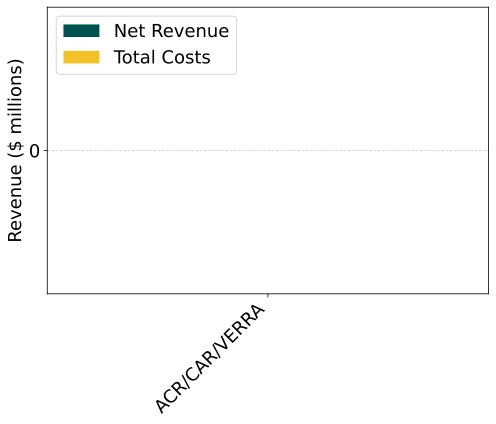

In [19]:
# Revenue bars by Protocol
plt.figure(figsize=(7,6))
bar_width = 0.15
x = range(len(fin_summary))

net_rev_million = fin_summary["NetRevenue"] / 1_000_000
costs_million = fin_summary["TotalCosts"] / 1_000_000

plt.bar(
    x,
    net_rev_million,
    width=bar_width,
    label="Net Revenue",
    color=brand.color.primary,
)

plt.bar(
    x,
    costs_million,
    width=bar_width,
    bottom=net_rev_million,
    label="Total Costs",
    color=brand.color.secondary,
)

plt.xticks(x, fin_summary["Protocol"], rotation=45, ha="right", fontsize=18)
plt.ylabel("Revenue ($ millions)", fontsize=18)

max_val = (fin_summary["TotalRevenue"].max() / 1_000_000)
plt.yticks(range(0, int(max_val) + 50, 50), fontsize=18)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc="upper left", fontsize=18)
plt.tight_layout()
plt.xticks(fontsize=18)
plt.show()

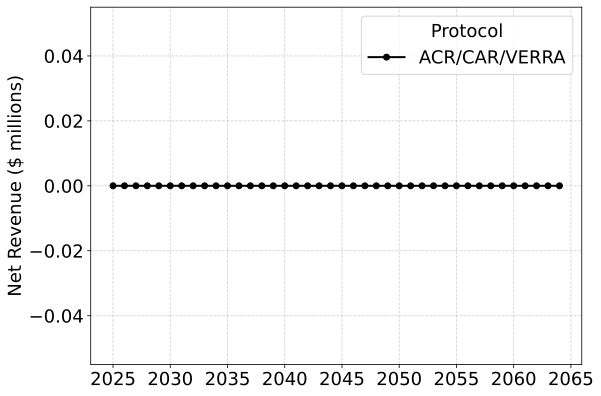

In [20]:
# Net Revenue by Protocol
plt.figure(figsize=(8,5.5))

for protocol, df_sub in dfCfin.groupby("Protocol"):
    plt.plot(
        df_sub["Year"],
        df_sub["NetRevenue"] / 1_000_000,
        marker="o",
        linewidth=2,
        label=protocol,
        color=protocol_colors.get(protocol, "black")
    )

plt.ylabel("Net Revenue ($ millions)", fontsize=18)

plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Protocol", fontsize=18, title_fontsize=18)
plt.tight_layout()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()